In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import os 
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from skimage.transform import resize

#new
import cv2
import glob
import datetime
from IPython.display import clear_output
from tensorflow.keras.losses import *
from tensorflow.keras.activations import *
from tensorflow.keras.metrics import *
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Input, Lambda, MaxPooling2D, Conv3D, Reshape, GRU
from tensorflow.keras.utils import plot_model

In [3]:
df = pd.read_csv("../input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/trainlist01.txt",sep = " ",header = None,names = ['path','class'])

In [4]:
df.head()
# video names and its classes

,path,class
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi,1
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi,1
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi,1
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi,1
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi,1


In [5]:
df['class'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101])

In [6]:
video_paths = []
classes = []

n = 50
i = 0

while (len(video_paths) < 10) and i < 102 :
    if (len(df[df['class'] == i]) >= n) :
        temp = df[df['class'] == i].iloc[:n]
        path = temp['path']
        Class = temp['class']
        video_paths.append(path)
        classes.append(Class)
    i+=1
        
video_paths = np.array(video_paths)
    

In [7]:
video_paths.shape

(10, 50)

In [8]:
classes = np.array(classes)

In [9]:
classes.shape

(10, 50)

In [10]:
video_paths = video_paths.reshape(500,)
classes = classes.reshape(500,)

In [11]:
y = np.array([i//50 for i in range(0,500)])

In [12]:
print(y)
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 

In [13]:
#print(video_paths)

In [14]:
def read_frames (root_folder, arr, each_nth = 10) : #root_folder : folder_path of videos , arr : array of video paths
    videos = []
    
    for i in range(len(arr)) :
        clear_output()
        print(round(i/len(arr)*100,3))  # tqdm ;)
        
        vcap = cv2.VideoCapture(root_folder+arr[i])
        success = True
        
        frames = []
        cnt = 0
        while success :
            try :
                success , image = vcap.read()
                cnt+=1
                if cnt%each_nth == 0 : # take a frame each 10 frames
                    image = resize(image, (128, 192))
                    frames.append(image)
            except Exception as e:
                print(e)
            
        videos.append(frames)
    
    return videos

In [15]:
def select_frames(frame_arr, n=10):
    videos = []
    
    for i in range(len(frame_arr)) :
        frames = []
        for j in np.linspace(0,len(frame_arr[i])-1, num = n) :
            frames.append(frame_arr[i][int(j)])
        videos.append(frames)
    
    videos = np.array(videos)
    print(videos.shape)
    return videos

In [16]:
x_frames = read_frames("../input/ucf101/UCF101/UCF-101/", video_paths)
x_frames = select_frames(x_frames, 10)

99.8
(500, 10, 128, 192, 3)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_frames, y, shuffle = True, test_size = 0.2, random_state = 42)

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

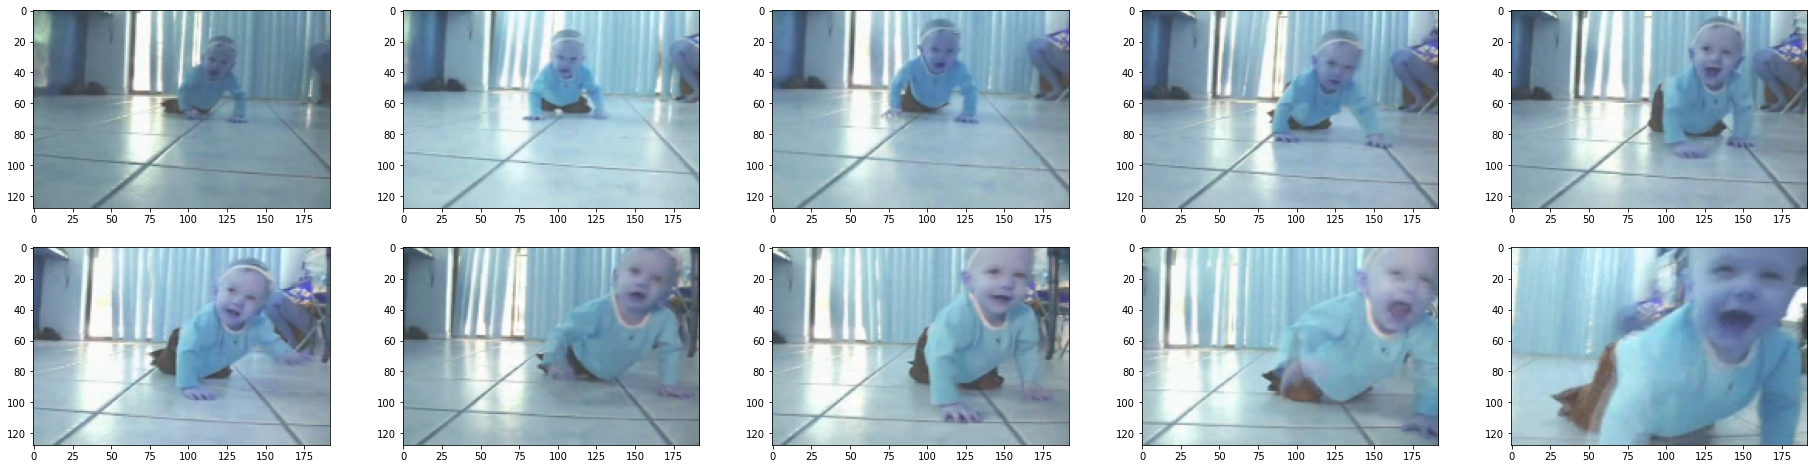

In [19]:
# random visiualization of frames of a video
plt.figure(figsize = (32,8))
rand_index = np.random.randint(10,len(x_frames))

for i, image in enumerate(x_frames[rand_index]) :
    plt.subplot(2,5, i+1)
    plt.imshow(image)

In [20]:
import tensorflow as tf

In [21]:
def lsit_to_stack (xs) :
    xs = tf.stack(xs)
    c = tf.shape(xs) 
    
    return xs

In [22]:
input_shape = (10, 128, 192, 3)
xs = []

inp = Input(input_shape)

for slice_indx in range(0,10,1) :
    x = Lambda(lambda x : x[:,slice_indx])(inp)
    x = BatchNormalization(momentum = 0.8)(x)
    x = Conv2D(filters = 20, kernel_size = 3, padding = 'same', activation = 'relu')(x)
    x = BatchNormalization(momentum = 0.8)(x)
    x = MaxPooling2D(pool_size = 2)(x)
    
    x = Conv2D(filters = 20, kernel_size = 3, padding = 'same', activation = 'relu')(x)
    x = BatchNormalization(momentum = 0.8)(x)
    x = MaxPooling2D(pool_size = 2)(x)
    x = Conv2D(filters = 20, kernel_size = 3, padding = 'same', activation = 'relu')(x)
    
    xs.append(x)
    
t = Lambda(lsit_to_stack)(xs)
t = Conv3D(50,3,padding = 'same')(t)
t = BatchNormalization(momentum = 0.8)(t)
target_shape = (10, 32*48*50)
t = Reshape(target_shape)(t)
t = GRU(25, return_sequences = True)(t)
t = GRU(50, return_sequences = False, dropout = 0.5)(t)
    
t = Dense(100, 'relu')(t)
out = Dense(10, activation = 'softmax')(t)
    
model = Model(inputs = inp, outputs = out)
sgd = SGD(lr = 0.0087)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
model.summary()

2022-02-16 23:42:18.474623: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10, 128, 192 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 192, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 192, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 192, 3)  0           input_1[0][0]                    
______________________________________________________________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


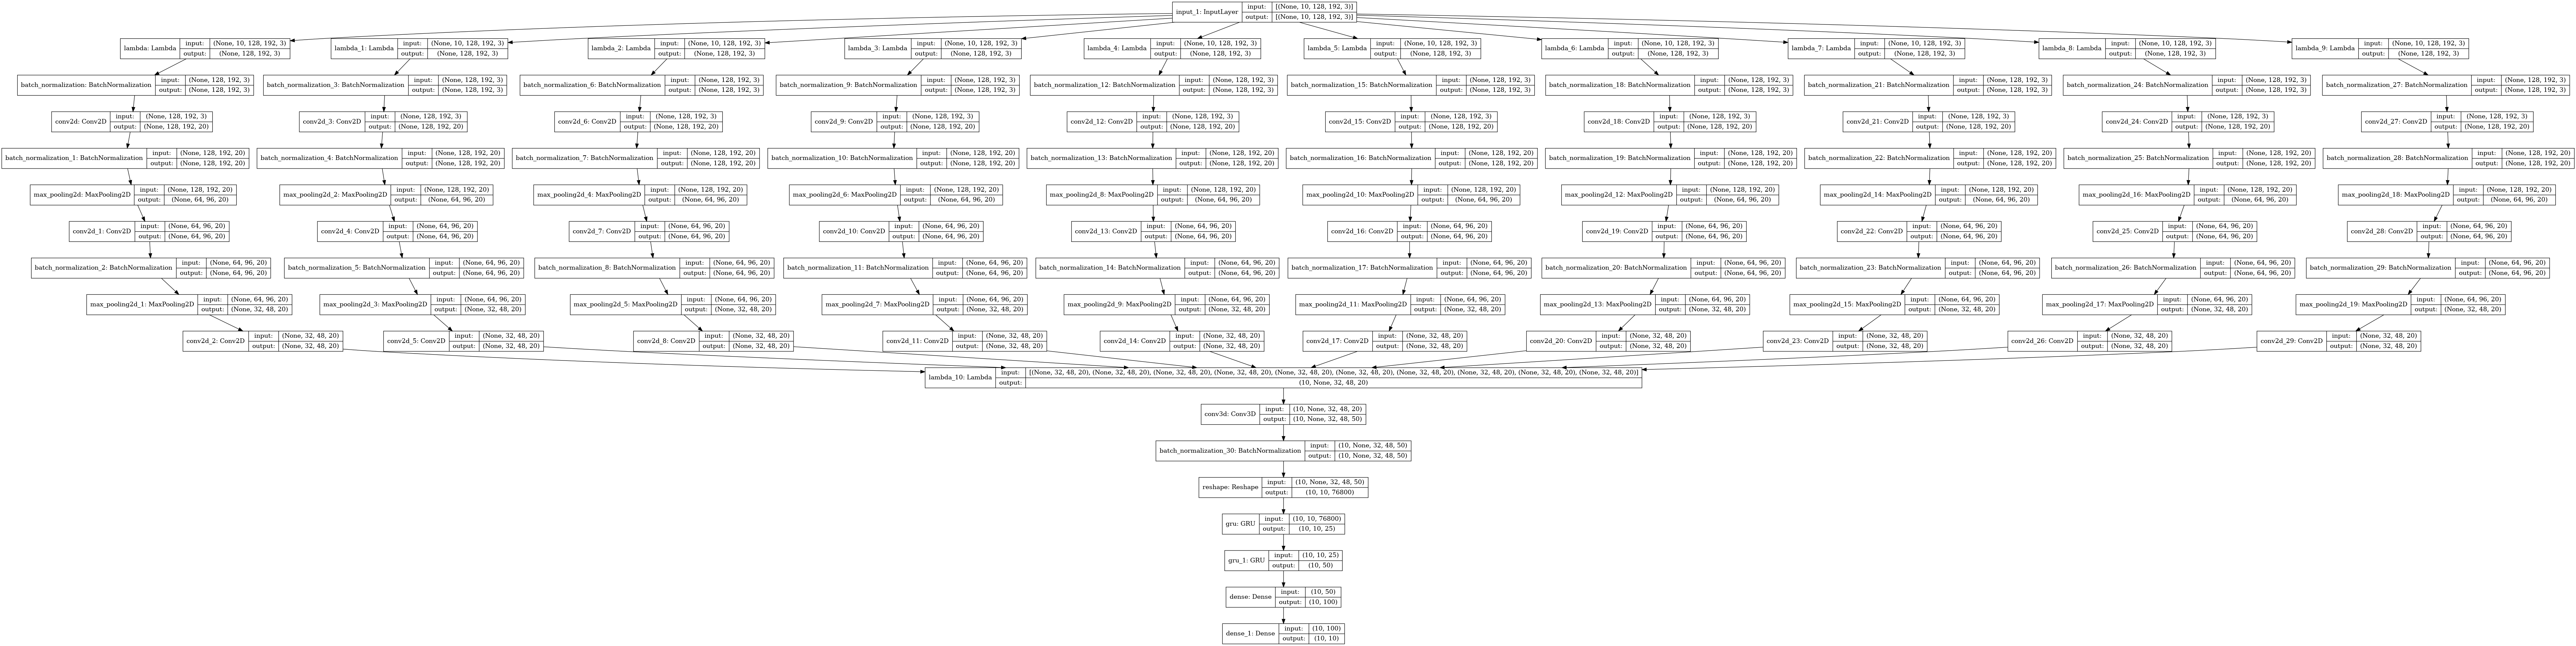

In [23]:
plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names=True)

In [24]:
model.fit(x_train, y_train, epochs = 5, shuffle = True, validation_data = (x_test, y_test), batch_size = 10)

2022-02-16 23:42:26.391889: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
40/40 [==============================] - 65s 1s/step - loss: 2.3085 - accuracy: 0.1225 - val_loss: 2.3699 - val_accuracy: 0.0700
Epoch 2/5
40/40 [==============================] - 56s 1s/step - loss: 2.3191 - accuracy: 0.1225 - val_loss: 2.3814 - val_accuracy: 0.0500
Epoch 3/5
40/40 [==============================] - 56s 1s/step - loss: 2.3085 - accuracy: 0.1400 - val_loss: 2.3529 - val_accuracy: 0.0600
Epoch 4/5
40/40 [==============================] - 56s 1s/step - loss: 2.3125 - accuracy: 0.1000 - val_loss: 2.3404 - val_accuracy: 0.0600
Epoch 5/5
40/40 [==============================] - 57s 1s/step - loss: 2.2930 - accuracy: 0.1275 - val_loss: 2.3217 - val_accuracy: 0.1200


In [25]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (4,4), padding = 'same', input_shape = (128, 192, 30), activation = 'relu'))
model.add(MaxPool2D(pool_size = (4,4)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 128, 192, 128)     61568     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 48, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 48, 64)        32832     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 24, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 24, 32)        8224      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 12, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0

In [26]:
print(x_train.shape)
print(y_train)
x_train2 = x_train.copy()
y_train2 = y_train.copy()

(400, 10, 128, 192, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [27]:
x_test2 = x_test.copy()
y_test2 = y_test.copy()

In [28]:
x_train2.shape

(400, 10, 128, 192, 3)

In [29]:
x_train2 = x_train2.reshape(400, 128,192,30)
x_test2 = x_test2.reshape(100, 128,192,30)

In [30]:
print(x_train2[0].shape)
print(y_train2[0].shape)

(128, 192, 30)
(10,)


In [31]:
hist = model.fit(x_train2, y_train2, epochs = 50, validation_data = (x_test2, y_test2))

Epoch 1/50
13/13 [==============================] - 42s 3s/step - loss: 2.4176 - accuracy: 0.1100 - val_loss: 2.2821 - val_accuracy: 0.1000
Epoch 2/50
13/13 [==============================] - 35s 3s/step - loss: 2.1961 - accuracy: 0.1775 - val_loss: 2.2476 - val_accuracy: 0.0800
Epoch 3/50
13/13 [==============================] - 35s 3s/step - loss: 2.0316 - accuracy: 0.2575 - val_loss: 1.8852 - val_accuracy: 0.2300
Epoch 4/50
13/13 [==============================] - 35s 3s/step - loss: 1.6908 - accuracy: 0.3725 - val_loss: 1.5663 - val_accuracy: 0.4800
Epoch 5/50
13/13 [==============================] - 36s 3s/step - loss: 1.4814 - accuracy: 0.4725 - val_loss: 1.3894 - val_accuracy: 0.4400
Epoch 6/50
13/13 [==============================] - 42s 3s/step - loss: 1.3547 - accuracy: 0.4875 - val_loss: 1.2942 - val_accuracy: 0.5500
Epoch 7/50
13/13 [==============================] - 43s 3s/step - loss: 1.1309 - accuracy: 0.5975 - val_loss: 1.0668 - val_accuracy: 0.6600
Epoch 8/50
13/13 [==

In [32]:
scores = pd.DataFrame(model.history.history)

<AxesSubplot:>

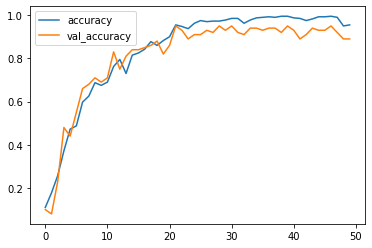

In [33]:
scores[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

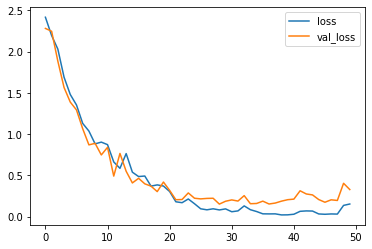

In [34]:
scores[['loss', 'val_loss']].plot()

In [35]:
model.save("video_data_set_model.h5", hist)